# Faster Classification with ResNet50

As deep learning workloads getting bigger, specialized hardware units were developed or adapted from existing products to **accelerate tasks like training and inference**.

Kaggle, tried to make users' life easier, providing free access to two types of accelerators(GPUs and TPUs) except the standard CPU. Another option that gets a lot of attention and research, but it isn't yet available here, is the [FPGAs](https://inaccel.com/).

This notebook shows how to classify images using the native Keras or **InAccel's Keras-like framework** in order to increase performance. With this modified Keras API, we can take advantange of FPGA acceleration, while developing a Machine Learning Workflow the same way as before.

Since, there are no FPGA resources here, you can execute the same accelerated example on [Inaccel Studio](https://labs.inaccel.com:8000/), an open platform that lets **professionals**, **students** and **researchers** develop accelerated applications from their browsers, with **free access to FPGAs**.

For this experiment we used 10 thousand images of the dog-breed-verification/test dataset and the pretrained on IMageNet ResNet50 Keras model.
The following runtime screenshots show the performance of the classification, measuring FPS(Frames/Images per Second) on the three hardware units.

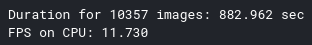
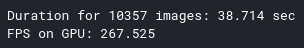
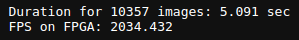

We notice that the FPGA accelerated solution processes more than 2000 Images per Second and achieves **170x speedup compared to CPU-only and 6.5x compared to the Kaggle offered GPU(P100) execution**.

Firstly, we import the necessary libraries and load the pretrained ResNet50 model.

For FPGA acceleration comment `tensorflow.keras` imports and comment out `inaccel.keras`.

In [ ]:
import numpy as np
import time
import os
import pandas as pd

from tensorflow.keras.applications.resnet50 import decode_predictions, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# from inaccel.keras.applications.resnet50 import decode_predictions, ResNet50
# from inaccel.keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
model = ResNet50(weights='imagenet')

Then we create an Image Generator for batch predictions

In [ ]:
test_filenames = os.listdir("../input/dog-breed-identification/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})

In [ ]:
images = ImageDataGenerator().flow_from_dataframe(
    test_df, 
    "../input/dog-breed-identification/test", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(224, 224),
    batch_size=64
)

Now, it's time to feed the model with the images and predict their class.

We also measure the performance as the number of Images processed Per Second.

In [ ]:
begin = time.monotonic()
predictions = model.predict(images, workers=16)
end = time.monotonic()

print('Duration for', len(predictions), 'images: %.3f sec' % (end - begin))
print('FPS on GPU: %.3f' % (len(predictions) / (end - begin)))

## Accuracy Check

Finally, we load some random images and plot them to check that the predictions are accurate.

In [ ]:
from IPython.display import Image, display

most_likely_labels = decode_predictions(predictions, top=3)

for i, img_path in enumerate(test_filenames[0:3]):
    display(Image('../input/dog-breed-identification/test/' + img_path))
    print(most_likely_labels[i])

## Conclusion

To learn more about Accelerated Machine Learning, be sure to check out:

* [Inaccel Cloud](https://labs.inaccel.com:8000/)
* [Github](https://github.com/inaccel)
* [Docs](https://docs.inaccel.com/)
* [Blog](https://inaccel.com/blog/)